# Airbnb review sentiment analysis
This notebook demonstrates how to build a deep learning model to analyze sentiments of Airbnb reviews.

In [85]:
import tensorflow as tf
import pandas as pd
import re
from langdetect import detect
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt

## Librarys used and what there purpose is
- Tensorflow
    - Is used to build, and train our sequential nerual network for sentiment analysis, handels text vectorization that converts text into numerical data.
- Pandas
    - Is used to load the dataset and create the dataframe, also allows us to filter and create sampling dataset.
- langdetect
    - Used for detecting english reviews.
- numpy
    - Helps us to create the necessary np array for training.
-  sklearn
    - Used to split the data into training and test sets, and get a detailed classification report. 
-  re
    - Used for text cleaning, such as remove the html tags from the reviews.
-  matplotlib
    - Used to plot and illustrate the result of the training and model loss

In [ ]:
# load the dataset
print("loading airbnb reviews dataset...")
df = pd.read_csv("reviews.csv")
print(f"Orginal dataset\n {df}")

loading airbnb reviews dataset...
Orginal dataset
                  listing_id                   id        date  reviewer_id  \
0                    164448               407660  2011-07-30       870312   
1                    164448               451097  2011-08-16       901633   
2                    164448               472271  2011-08-24       894674   
3                    164448               521708  2011-09-11       232485   
4                    164448               568347  2011-09-26       896712   
...                     ...                  ...         ...          ...   
144943  1305729897949100039  1317299844322463966  2024-12-22    666963478   
144944  1306393577432561110  1315873156254706149  2024-12-20    442177472   
144945  1310885179474906446  1316587888366107935  2024-12-21     53058534   
144946  1312171107579620356  1320280905319488958  2024-12-26    595482193   
144947  1316786620019656619  1322401494741586698  2024-12-29    135251598   

       reviewer_name    

# Data cleaning

In [87]:
# Clean html tags
def clean_html(text):
    if isinstance(text, str):
        return re.sub(r"<.*?>", "", text)
    return text

In [88]:
# Remove the empty comments rows
df = df.dropna(subset=["comments"])
df["comments"] = df["comments"].apply(clean_html)
print(f"After remoing empty comments\n {df}")

After remoing empty comments
                  listing_id                   id        date  reviewer_id  \
0                    164448               407660  2011-07-30       870312   
1                    164448               451097  2011-08-16       901633   
2                    164448               472271  2011-08-24       894674   
3                    164448               521708  2011-09-11       232485   
4                    164448               568347  2011-09-26       896712   
...                     ...                  ...         ...          ...   
144943  1305729897949100039  1317299844322463966  2024-12-22    666963478   
144944  1306393577432561110  1315873156254706149  2024-12-20    442177472   
144945  1310885179474906446  1316587888366107935  2024-12-21     53058534   
144946  1312171107579620356  1320280905319488958  2024-12-26    595482193   
144947  1316786620019656619  1322401494741586698  2024-12-29    135251598   

       reviewer_name                         

In [89]:
# Filter out the rows that isn't in English
def is_english(text):
    try:
        return detect(text) == "en"
    except:
        return False
    
df["is_english"] = df["comments"].apply(is_english)
df = df[df["is_english"]]
print(f"After removing non-english comments\n {df}")

After removing non-english comments
                  listing_id                   id        date  reviewer_id  \
0                    164448               407660  2011-07-30       870312   
1                    164448               451097  2011-08-16       901633   
2                    164448               472271  2011-08-24       894674   
3                    164448               521708  2011-09-11       232485   
4                    164448               568347  2011-09-26       896712   
...                     ...                  ...         ...          ...   
144935  1298347645930946959  1307248295819579395  2024-12-08    479920506   
144938  1301950247646962698  1316668854181848371  2024-12-21     34223838   
144940  1302247401950369176  1307146471377559196  2024-12-08      1922353   
144942  1304284803854492401  1307949554237811713  2024-12-09     86342696   
144944  1306393577432561110  1315873156254706149  2024-12-20    442177472   

       reviewer_name                  

# Simple sentiment analysis
Creating initial sentiment labels using a word based approach

In [90]:
positive_words = [
    "great", "good", "nice", "excellent", "perfect", "happy", "wonderful", 
    "fantastic", "amazing", "love", "best", "beautiful", "clean", "comfortable",
    "helpful", "recommend", "enjoyed", "pleasant", "delightful", "convenient",
    "friendly", "impressed", "satisfied", "superb", "lovely", "exceptional",
    "outstanding", "brilliant", "spotless", "spacious", "convenient", "ideal",
    "charming", "cozy", "luxurious", "modern", "stylish", "relaxing", "peaceful"
]

negative_words = [
    "bad", "poor", "terrible", "horrible", "awful", "worst", "dirty", 
    "disappointing", "disappointment", "uncomfortable", "problem", "not clean", "broken",
    "issue", "issues", "annoying", "noisy", "small", "expensive", "overpriced",
    "rude", "unpleasant", "unhelpful", "disgusting", "outdated", "smelly",
    "misleading", "stained", "cramped", "cold", "hot", "bugs", "cockroaches",
    "musty", "mold", "mildew", "rundown", "unsafe", "sketchy", "dusty"
]

In [91]:
def simple_sentiment(text):
    if not isinstance(text, str):
        return 1
    
    text = text.lower()
    pos_count = sum(1 for word in positive_words if word in text)
    neg_count = sum(1 for word in negative_words if word in text)

    negations = ["not", "isn't", "aren't", "wasn't", "weren't", "don't", "doesn't", 
                "didn't", "can't", "couldn't", "shouldn't", "wouldn't", "no", "never"]
    # Example: The floor was not dirty.
    for neg in negations:
        neg_pattern = f"{neg}"
        if neg_pattern in text:
            for i, word in enumerate(positive_words):
                if f"{neg} {word}" in text:
                    pos_count -= 1
                    neg_count += 1

    if neg_count > pos_count * 0.7:
        return "NEGATIVE" 
    else:
        return "POSITIVE"

In [92]:
# create simple labels
df["sentiment_label"] = df["comments"].apply(simple_sentiment)

In [93]:
# Print distribution of initial labels
print("\nInitial sentiment distribution:")
label_counts = df["sentiment_label"].value_counts()
print(label_counts)
print(f"Positive percentage: {label_counts[1]/len(df)*100:.2f}%")


Initial sentiment distribution:
sentiment_label
POSITIVE    95920
NEGATIVE     3766
Name: count, dtype: int64
Positive percentage: 3.78%


/tmp/ipykernel_1803/2134060337.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Positive percentage: {label_counts[1]/len(df)*100:.2f}%")


# Handle class imbalance
Balancing the dataset to improve model training:

In [94]:
#Convert sentiment labels to numeric values
df["sentiment_numeric"] = df["sentiment_label"].map({"POSITIVE": 1, "NEGATIVE": 0})

In [95]:
# Handle class imbalance
positive_samples = df[df["sentiment_numeric"] == 1]
negative_samples = df[df["sentiment_numeric"] == 0]

In [96]:
# get some number of positive samples as negative samples
positive_down_sampled = positive_samples.sample(n=len(negative_samples) * 3, random_state=42)
balanced_df = pd.concat([positive_down_sampled, negative_samples])

print(f"\nBalanced dataset shape: {balanced_df.shape}")
print("Balanced sentiment distribution:")
print(balanced_df['sentiment_label'].value_counts())


Balanced dataset shape: (15064, 9)
Balanced sentiment distribution:
sentiment_label
POSITIVE    11298
NEGATIVE     3766
Name: count, dtype: int64


# Split the data
Creating training and testing datasets:

In [97]:
# split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(
    balanced_df["comments"],
    balanced_df["sentiment_numeric"],
    test_size=0.2,
    stratify=balanced_df["sentiment_numeric"],
    random_state=42
)

print(f"Training set size: {len(x_train)}")
print(f"Test set size: {len(x_test)}")

Training set size: 12051
Test set size: 3013


# Text Preprocessing
Creating a text vectorization layer:

In [98]:
#create a text vectorization layer
max_features = 15000
sequence_length = 300

vectorize_layer = tf.keras.layers.TextVectorization(
    standardize="lower_and_strip_punctuation",
    max_tokens=max_features,
    output_mode="int",
    output_sequence_length=sequence_length
)


In [99]:
vectorize_layer.adapt(x_train.values)

# Build the model
Creating a nerual network for sentiment classification:

In [100]:
# build the model
embedding_dim = 16

model = tf.keras.Sequential([
    vectorize_layer,
    tf.keras.layers.Embedding(max_features + 1,embedding_dim),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

In [101]:
# compile the model
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
    optimizer="adam",
    metrics=["accuracy"]
)
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ text_vectorization_3            │ ?                      │   0 (unbuilt) │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_3 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_3      │ ?                      │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

# Train the model
Training the sentiment analysis model:

In [102]:
# Train the model
x_train = np.array(x_train)
y_train = np.array(y_train)
print(x_train.dtype, y_train.dtype)


history = model.fit(
    x_train,
    y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

object int64
Epoch 1/10
302/302 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7377 - loss: 0.5528 - val_accuracy: 0.7652 - val_loss: 0.5233
Epoch 2/10
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7569 - loss: 0.5256 - val_accuracy: 0.7719 - val_loss: 0.5095
Epoch 3/10
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7582 - loss: 0.5264 - val_accuracy: 0.7781 - val_loss: 0.4958
Epoch 4/10
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7783 - loss: 0.4960 - val_accuracy: 0.7818 - val_loss: 0.4868
Epoch 5/10
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7749 - loss: 0.4933 - val_accuracy: 0.7881 - val_loss: 0.4672
Epoch 6/10
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7909 - loss: 0.4681 - val_accuracy: 0.7926 - val_loss: 0.4501
Epoch 7/10
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8013 - loss: 0.4403 - val_accuracy: 0.8067 - val_loss: 0.4384
Epoch 8/10
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7997 - loss: 0.4336 - val

# Evaluate the model
Testing the models performance:

In [103]:
# eval model

x_test = np.array(x_test.tolist()) if isinstance(x_test, np.ndarray) else np.array(x_test)
y_test = np.array(y_test.tolist()) if isinstance(y_test, np.ndarray) else np.array(y_test)


loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {accuracy:.4f}")

95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8203 - loss: 0.3782
Test accuracy: 0.8188


# Analyze model performance
Generating a classification report to understand model strengths and weaknessess:

In [104]:
# predict and analyse
predictions = model.predict(x_test)
binary_predictions = (predictions > 0.5).astype(int)

95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [105]:
# print classification report, 0 = negative, 1 = true
print("Classification report:")
print(classification_report(y_test, binary_predictions))

Classification report:
              precision    recall  f1-score   support

           0       0.82      0.35      0.49       753
           1       0.82      0.97      0.89      2260

    accuracy                           0.82      3013
   macro avg       0.82      0.66      0.69      3013
weighted avg       0.82      0.82      0.79      3013



## Understand the classification report
- 0: Is the negative reviews
- 1: Is the positive reviews
- Precision: when the model predicts a particular class, how often is it correct.
- Recall: Of all actual instances of a class, how many did the model correctly identify
- f1-score: Mean of precision and recall
- Support: Number of occurrences of each class in the test
- Accuracy: How much the model is correct overall
- Macro avg: Simple average of metrics across classes
- Weighted avg: Average weigthed by the number of samples in each class 


# Visualize traning history
Creating visualizations of model training process:

Saved training history to 'training_history.png'


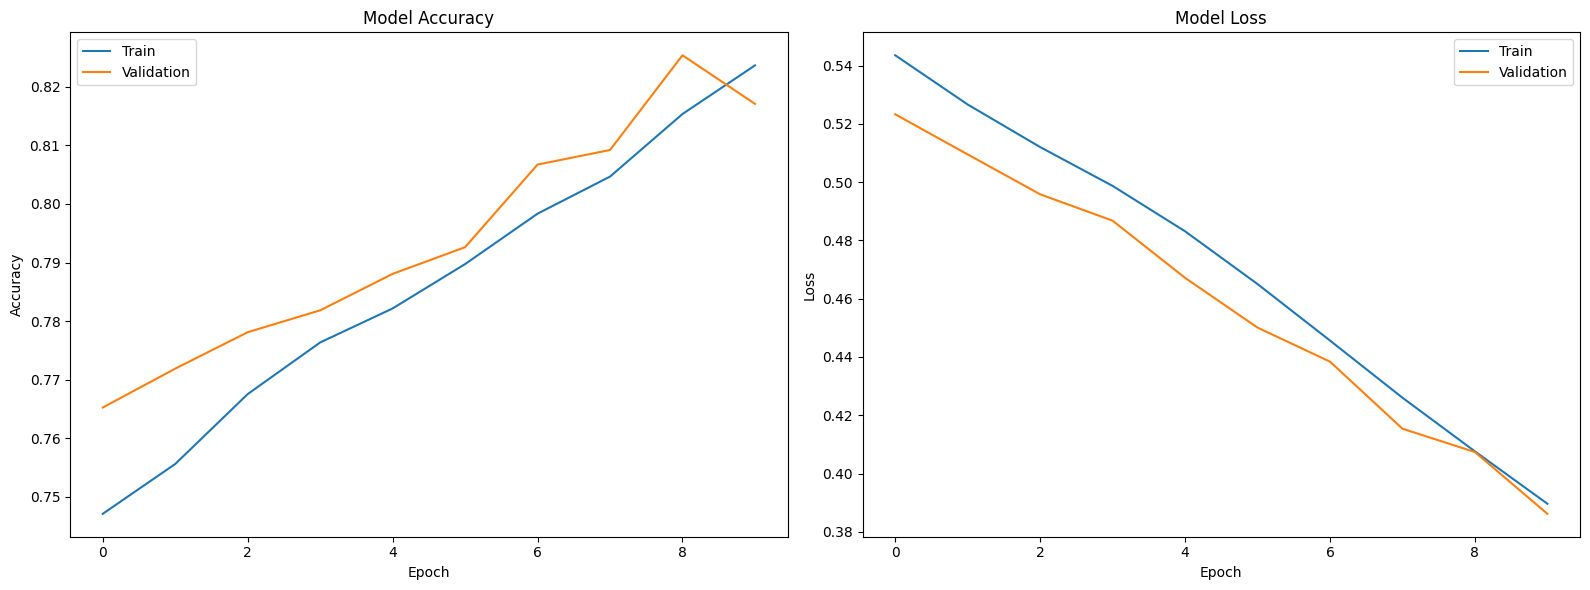

In [ ]:
# visualize traning history
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])

plt.tight_layout()
plt.savefig('training_history.png')
print("Saved training history to 'training_history.png'")

In [107]:
# save the model
model.save("airbnb_sentiment_model.keras")
print("Model saved to 'airbnb_sentiment_model'")

Model saved to 'airbnb_sentiment_model'


# Apply model to full dataset
Using the trained model to classify sentiments in the original dataset:

In [108]:
# apply model to full dataset
export_model = tf.keras.Sequential([
    vectorize_layer,
    model.layers[1],
    model.layers[2],
    model.layers[3],
    model.layers[4],
    model.layers[5]
])

In [109]:
# sample the data if its to large
sample_size = min(10000, len(df))
df_sample = df.sample(n=sample_size, random_state=42)

In [110]:
# Apply the model to the sampled data
df_sample['ml_sentiment_score'] = export_model.predict(df_sample['comments'].astype(str).values)
df_sample['ml_sentiment'] = (df_sample['ml_sentiment_score'] > 0.5).astype(int)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [111]:
df_sample["ml_sentiment_label"] = df_sample["ml_sentiment"].map({1: "POSITIVE", 0: "NEGATIVE"})
output_columns = ["listing_id", "id", "date", "reviewer_id", "reviewer_name", "comments", "ml_sentiment_score", "ml_sentiment_label"]
df_sample[output_columns].to_csv("classified_reviews_ml_1.csv", index=False)

print("\nSaved classified reviews to 'classified_reviews_ml_1.csv'")
print("Sample of the output:")
print(df_sample[output_columns].head())


Saved classified reviews to 'classified_reviews_ml_1.csv'
Sample of the output:
                listing_id                   id        date  reviewer_id  \
73727             36781505  1189743028714292817  2024-06-29    188893957   
64853             31919882            462669774  2019-06-02    126590307   
53680             26035968  1202817272612865311  2024-07-17    134376541   
107250  620838362122237480   931061284082856145  2023-07-08    108726876   
17260              6242152   646168561126218993  2022-06-10    174985334   

       reviewer_name                                           comments  \
73727         Nienke  We had a good stay, the apartment was as pictu...   
64853         Ursula  Very good communication, Roba was super nice a...   
53680             은비  It was such a nice & great memories here.It wa...   
107250           Zoe  Amazing property! It is so cute, has everythin...   
17260         Ramana  Roger’s place has got a cool vibe, and is in a...   

        ml_